# Sale Analytics


### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import os

### Task-1: Merge The 12 Monthes of sales data into a single CSV file 

In [2]:
df = pd.read_csv("./Sale_Analytics/Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir(".//Sale_Analytics/Sales_Data")]

all_months_data = pd.DataFrame()

for file in files: 
    df = pd.read_csv("./Sale_Analytics/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])
    
all_months_data.to_csv("all_data.csv", index = False) 

### Read Updated Data 

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### CleanUp The data

In [4]:
# Drop NaN rows

In [5]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how = "all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
# Find 'Or' and delete it

In [7]:
temp_df = all_data[all_data["Order Date"].str[0:2] == "Or"]

all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
# Covert Columns to correct type

In [9]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"]) 
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

### Augment data with addtional columns  

#### Task-2 Add month columns

In [10]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task- 3 Add Sales Columns

In [11]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task-4 Add City Columns

In [12]:
# Lets'use .apply() methoed

def get_city(address):
    return address.split(",")[1]
def get_state(address):
    return address.split(",")[2].split(' ')[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x : f"{get_city(x)} ({get_state(x)})") 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Question-1 What was the best month for sale ? How much earned that month? 

In [13]:
result= all_data.groupby(["Month"])["Sales"].sum().reset_index()
result

,Month,Sales
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


## Data Visualization

In [14]:
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

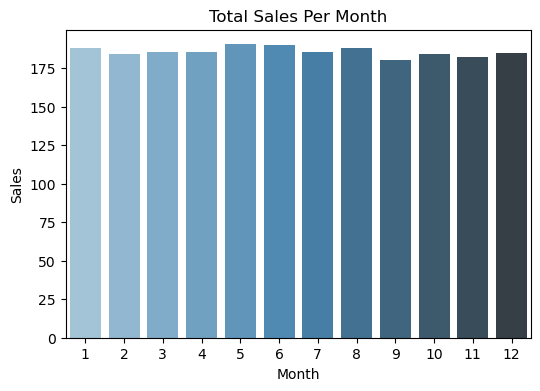

In [15]:
plt.figure(figsize=(6,4))

sns.barplot(x ="Month", y ="Sales", data = all_data, palette='Blues_d', errorbar=None)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Total Sales Per Month")
plt.show()

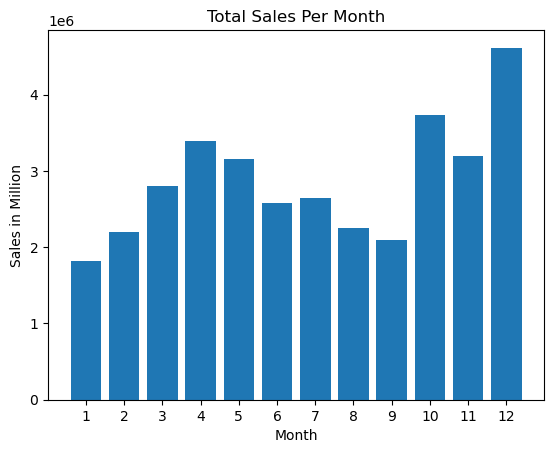

In [30]:
months = range(1,13)
plt.bar(months,result["Sales"])
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Sales in Million")
plt.title("Total Sales Per Month")
plt.show()

### Ans - We can see in ghrap that December Month have hightes Sale  

### Question-2  What City had the highest  number of sales ?

In [17]:
result_2 = all_data.groupby(["City"])["Sales"].sum().reset_index()
result_2

,City,Sales
0,Atlanta (GA),2795498.58
1,Austin (TX),1819581.75
2,Boston (MA),3661642.01
3,Dallas (TX),2767975.40
4,Los Angeles (CA),5452570.80
5,New York City (NY),4664317.43
6,Portland (ME),449758.27
7,Portland (OR),1870732.34
8,San Francisco (CA),8262203.91
9,Seattle (WA),2747755.48


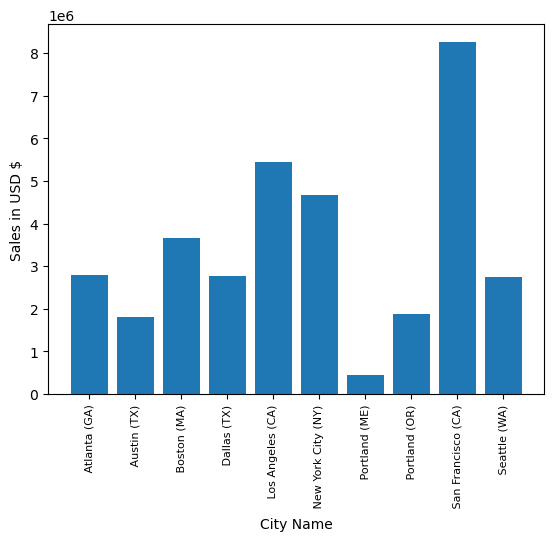

In [18]:
cities = [city for city, df in all_data.groupby("City") ]

plt.bar(cities,result_2["Sales"])
plt.xticks(cities, rotation ="vertical", size=8)
plt.xlabel("City Name")
plt.ylabel("Sales in USD $")
plt.show()

### Ans - San Francisco have highest Sales.

### Question-3  What time should we display advertisements to maximize likelihood of customer's buying product ?

In [19]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

C:\Users\Akhtarhusen\AppData\Local\Temp\ipykernel_23088\2617628323.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])


In [20]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


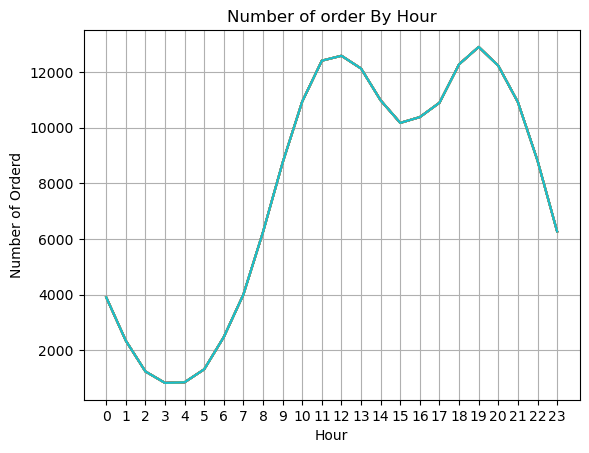

In [36]:
hours = [hour for hour , df in all_data.groupby("Hour")]

plt.plot(hour, all_data.groupby(["Hour"]).count())
plt.xticks(hour)
plt.title("Number of order By Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Orderd")
plt.grid()

plt.show()

### Ans - 11 am & 7 pm (19) is best time for advertisements.

### Question - 4 What products are most often sold together? 

In [22]:
df = all_data[all_data["Order ID"].duplicated(keep = False)]


df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x : ','.join(x))
df = df[["Order ID", "Grouped"]].drop_duplicates()
df.head()

C:\Users\Akhtarhusen\AppData\Local\Temp\ipykernel_23088\1791345392.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x : ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [23]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
    
for key , value in count.most_common(10):
    print(key,value)
       

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question - 5 What product sold most ? why do you think it sold most?

In [24]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [25]:
Quantity_sum = all_data.groupby("Product")["Quantity Ordered"].sum().reset_index()
Quantity_sum.head()

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635


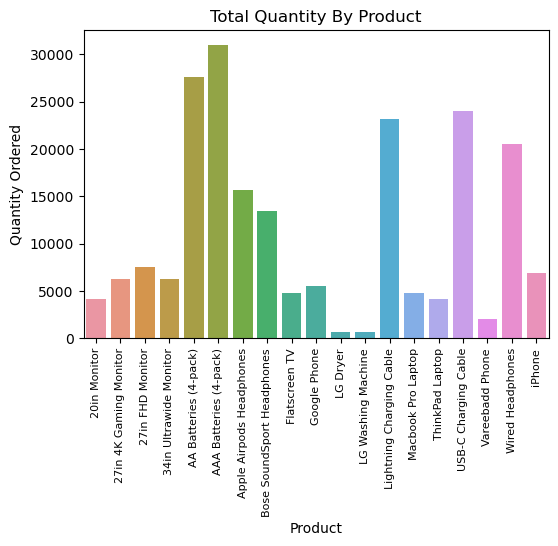

In [26]:
plt.figure(figsize = (6,4))

sns.barplot(x = "Product", y= "Quantity Ordered", data = Quantity_sum  )
plt.title("Total Quantity By Product")
plt.xticks(rotation= 'vertical', size = 8)
plt.show()



In [27]:
Price_mean = all_data.groupby("Product")["Price Each"].mean().reset_index()
Price_mean.head()

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84


In [28]:
merged_data = pd.merge(Quantity_sum,Price_mean,on= "Product")
merged_data.head()

,Product,Quantity Ordered,Price Each
0,20in Monitor,4129,109.99
1,27in 4K Gaming Monitor,6244,389.99
2,27in FHD Monitor,7550,149.99
3,34in Ultrawide Monitor,6199,379.99
4,AA Batteries (4-pack),27635,3.84


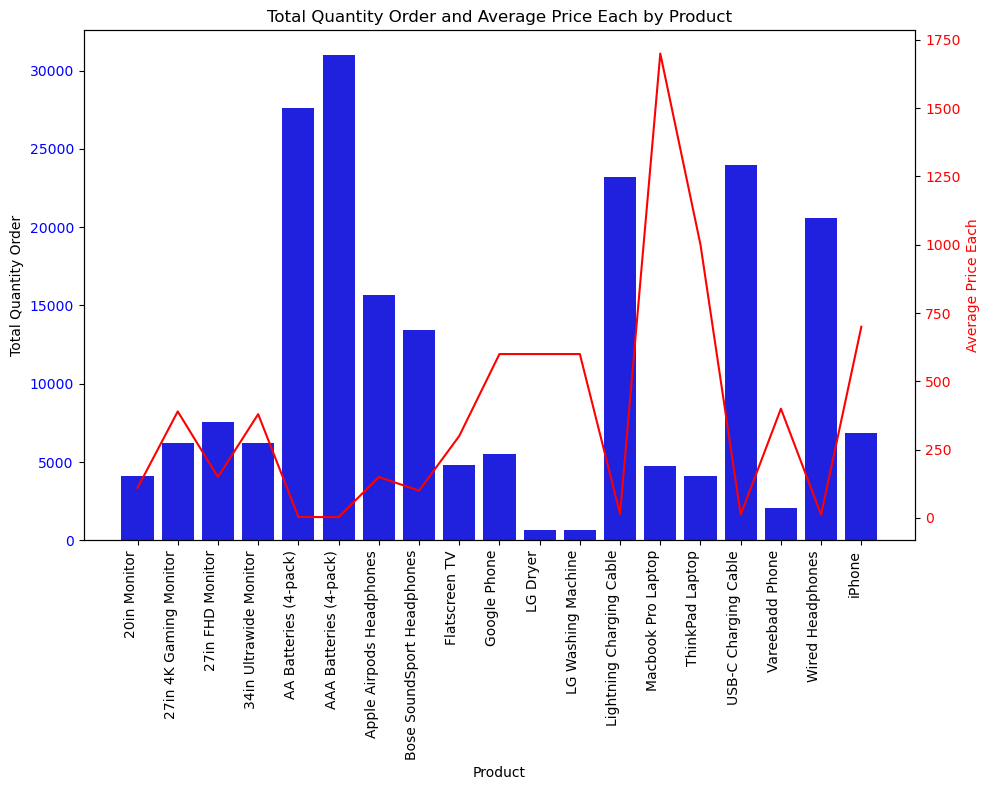

In [29]:
# Now Plot 

fig, ax1 = plt.subplots(figsize = (10,8))

sns.barplot(x = "Product", y = "Quantity Ordered" , data = merged_data , ax = ax1 , color = "b")
ax1.set_xlabel("Product")

ax1.set_ylabel("Total Quantity Order")
ax1.tick_params(axis ="y", labelcolor = "b")

ax2 = ax1.twinx()
sns.lineplot(x = "Product", y = "Price Each", data = merged_data, ax = ax2 , color = "r")
ax2.set_ylabel("Average Price Each", color = "r")
ax2.tick_params(axis = "y", labelcolor = "r")

plt.title("Total Quantity Order and Average Price Each by Product")
# Rotate x-axis labels
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
    tick.set_horizontalalignment('right')
plt.tight_layout()
plt.show()